# 1 Framing the Problem

Employers are always striving to motivate, and create a pleasant work environment for their team members, with the goal of increasing productivity levels, while maintaining strong employee retentions. It's also not a coincidence that each year, Employers are competing to land on the top 100 rankings such as "[Canada's Top 100 Employers](https://www.canadastop100.com/)" and "[Great Place To Work.](https://www.greatplacetowork.ca)"

In order to evaluate the quality of each Employers, we need to analyze Employer Reviews written by both former and current Employees to determine the results. Luckily, "[Glassdoor](https://www.glassdoor.ca)" was created for this reason, which gives an inside scope of each Employers. By understanding the main topics in each Employer Reviews, Employers can then make adjustment to improve their work environment, which ultimately improves Employee productivity/retention.

However, some Employers have hundreds and thousands of reviews, which can take up a lot of time and resource to complete before determining the results.
<br>
<br>

**Business Solutions:**

To solve this issue, we will extract the main topics from all Employer Reviews for each Employer, to determine the overall consensus.

We will perform an <u>unsupervised learning</u> algorithm called Topic Modeling, with Latent Dirichlet Allocation (LDA) Model, and LDA Mallet (Machine Learning Language Toolkit) Model.

We will also determine the dominant topic associated to each Employee Reviews, as well as determining the Employee Reviews for each dominant topics for an in-depth analysis.
<br>
<br>

**Benefits:**
- Efficiently determine the main topics of Employer Reviews
- Increase Employee productivity/retention by improving work environments based on topics from Employer Reviews
- Conveniently determine the topics of each review
- Extract detailed information by determining the most relevant review for each topic 
<br>
<br>

**Robustness:**

To ensure the model performs well, we will take the following approach:
- Run the LDA Model and the LDA Mallet Model to compare the performances of each model
- Run the LDA Mallet Model and optimize the number of topics in the Employer Reviews by choosing the optimal model with highest performance

<u>Note</u> that the main different between LDA Model vs. LDA Mallet Model is that LDA Model uses Variational Bayes method which is faster, but less precise than LDA Mallet Model which uses Gibbs Sampling. 
<br>
<br>

**Assumption:**
- To save computation power and time, we have taken a sample size of 500 for each Employers, and assuming that this dataset is sufficient to capture the topics in the Employer Reviews
- We're also assuming that the results in this model is applicable in the same way, as if the model were applied on an entire population of the Employer Reviews dataset, with the exception of few parameter tweaks 
<br>
<br>

**Future:**

This is model is a Part Two of the "[Quality Control for Banking using LDA and LDA Mallet,](https://nbviewer.jupyter.org/github/mick-zhang/Quality-Control-for-Banking-using-LDA-and-LDA-Mallet/blob/master/Topic%20Bank%20Github.ipynb?flush_cache=true)" where we're able to showcase information on Employer Reviews with full visualization of the results.

# 2 Data Overview

In [1]:
import pandas as pd
csv = ("employee_reviews.csv")
df = pd.read_csv(csv, encoding='latin1') # Solves enocding issue when importing csv
df.head(5)

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [2]:
df['company'].unique()

array(['google', 'amazon', 'facebook', 'netflix', 'apple', 'microsoft'],
      dtype=object)

After importing the data, we see that the "summary" column is where the Employer Reviews are for each Employers. This is the column that we are going to use for extracting topics.

Also, we see that there are 5 different Employers under the "company" column. As a result, we will review each company individually to capture the results of the Employer Reviews.

<u>Note</u>: To reduce redundancy, we will showcase the steps below for the 1st Employer, and only the results for other Employers. The same steps that we will use for the 1st Employer can be replicated for other Employers.

# 3 Topics Analysis for Google

In [3]:
# Filters to Google only
dfg = df[df['company'] == 'google']

# Filters the data to the column needed for topic modeling
dfg = dfg[['summary']]

# Use the first 500 sample size
dfg = dfg.head(500)

Here we filter the dataset to the 1st Employer, and then we filtered to "summary" column for Employer Reviews. Lastly, we reduced the size of the sample to 500 to save computation time and power.

# 4 Data Cleaning

We will use regular expressions to clean out any unfavorable characters in our dataset, and then preview what the data looks like after the cleaning.

In [7]:
data = dfg['summary'].values.tolist() # convert to list

# Use Regex to remove all characters except letters and space
import re
data = [re.sub(r'[^a-zA-Z ]+', '', str(sent)) for sent in data] 

# Preview the first list of the cleansed data
from pprint import pprint
pprint(data[:1])

['Best Company to work for']


# 5 Pre-Processing

With our data now cleaned, the next step is to pre-process our data so that it can used as an input for our LDA model.

We will perform the following:
- Breakdown each sentences into a list of words through Tokenization by using Gensim's `simple_preprocess`
- Additional cleaning by converting text into lowercase, and removing punctuations by using Gensim's `simple_preprocess` once again
- Remove stopwords (words that carry no meaning such as to, the, etc) by using NLTK's `corpus.stopwords`
- Apply Bigram and Trigram model for words that occurs together (ie. warrant_proceeding, there_isnt_enough) by using Gensim's `models.phrases.Phraser`
- Transform words to their root words (ie. walking to walk, mice to mouse) by Lemmatizing the text using `spacy.load(en)` which is Spacy's English dictionary

In [11]:
# Implement simple_preprocess for Tokenization and additional Cleaning
import gensim
from gensim.utils import simple_preprocess 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) # deacc=True removes punctuations       
data_words = list(sent_to_words(data))


# Remove stopwords using gensim's simple_preprocess and NLTK's stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use']) # add additional stop words
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]   
data_words_nostops = remove_stopwords(data_words)


# Create and Apply Bigrams and Trigrams
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases
trigram = gensim.models.Phrases(bigram[data_words], threshold=100
bigram_mod = gensim.models.phrases.Phraser(bigram)    # Faster way to get a sentence into a trigram/bigram
trigram_mod = gensim.models.phrases.Phraser(trigram)
def make_trigram(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
data_words_trigrams = make_trigram(data_words_nostops)
                                

# Lemmatize the data
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) # adds English dictionary from Spacy
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        # lemma_ is base form and pos_ is lose part
    return texts_out
data_lemmatized = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

                                
# Preview the data     
print(data_lemmatized[:1])

[['good', 'company', 'work']]


Here we see texts that are Tokenized, Cleaned (stopwords removed), Lemmatized with applicable bigram and trigrams.

# 6 Prepare Dictionary and Corpus

Now that are data has been cleaned and pre-processed, here are the final steps that we need to implement before our data is ready for LDA input:
- Create a dictionary from our pre-processed data using Gensim's `corpora.Dictionary`
- Create a corpus by applying "term frequency" (word count) to our "pre-processed data dictionary" using Gensim's `.doc2bow`

In [12]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_lemmatized)      # Create dictionary
texts = data_lemmatized                            # Create corpus
corpus = [id2word.doc2bow(text) for text in texts] # Apply Term Frequency
print(corpus[:1])                                  # Preview the data

[[(0, 1), (1, 1), (2, 1)]]


We can see that our corpus is a list of every word in an index form followed by their count frequency.

In [13]:
id2word[0]

'company'

We can also see the actual word of each index by calling the index from our pre-processed data dictionary.

In [14]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('company', 1), ('good', 1), ('work', 1)]]

Lastly, we can see the list of every word in actual word (instead of index form) followed by their count frequency using a simple `for` loop.

Now that we have created our dictionary and corpus, we can now feed the data into our LDA Model.

# 7 LDA Model

**Latent (hidden) Dirichlet Allocation** is a generative probabilistic model of a documents (composites) made up of words (parts). The model is based on the probability of words when selecting (sampling) topics (category), and the probability of selecting topics when selecting a document.

Essentially we are extracting topics in documents by looking at the probability of words to determine the topics, and then the probability of topics to determine the document. 

There are two LDA algorithms. The **Variational Bayes** is used by Gensim's **LDA Model**, while **Gibb's Sampling** is used by **LDA Mallet Model** using Gensim's Wrapper package.

Here is the general overview of Variational Bayes and Gibbs Sampling:
- **Variational Bayes**
    - Sampling the variations between each word (part or variable) to determine which topic it belongs to (but some variations cannot be explained)
    - Fast but less accurate
- **Gibb's Sampling (Markov Chain Monte Carlos)**
    - Sampling one variable at a time, conditional upon all other variables
    - Slow but more accurate

In [15]:
# Build LDA Model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics = 7, random_state = 100,
                                            update_every = 1, chunksize = 100, passes = 10, alpha = 'auto',
                                            per_word_topics=True) # Here we selected 7 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.102*"google" + 0.071*"great" + 0.036*"sale" + 0.029*"job" + 0.024*"pay" + '
  '0.023*"love" + 0.022*"perk" + 0.022*"balance" + 0.020*"internship" + '
  '0.018*"business"'),
 (1,
  '0.054*"experience" + 0.040*"lead" + 0.023*"grad" + 0.023*"associate" + '
  '0.020*"analytical" + 0.019*"designer" + 0.017*"strategist" + 0.011*"brand" '
  '+ 0.010*"solution" + 0.010*"interactive"'),
 (2,
  '0.172*"manager" + 0.063*"account" + 0.044*"program" + 0.041*"senior" + '
  '0.038*"product" + 0.025*"marketing" + 0.024*"culture" + 0.022*"bad" + '
  '0.020*"staff" + 0.017*"new"'),
 (3,
  '0.233*"engineer" + 0.206*"software" + 0.071*"review" + 0.022*"cloud" + '
  '0.016*"engineering" + 0.015*"developer" + 0.014*"pgm" + 0.013*"need" + '
  '0.013*"senior" + 0.011*"legal"'),
 (4,
  '0.166*"work" + 0.143*"good" + 0.141*"place" + 0.139*"great" + '
  '0.112*"company" + 0.013*"career" + 0.012*"awesome" + 0.011*"excellent" + '
  '0.008*"start" + 0.008*"stuff"'),
 (5,
  '0.070*"intern" + 0.067*"amazing

After building the LDA Model using Gensim, we display the 7 topics in our document along with the top 10 keywords and their corresponding weights that makes up each topic.

# 8 LDA Model Performance

In [16]:
# Compute perplexity
print('Perplexity: ', lda_model.log_perplexity(corpus))

# Compute coherence score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)


Perplexity:  -5.49701415002346

Coherence Score:  0.6258108598839495


In order to determine the accuracy of the topics that we used, we will compute the Model Perplexity and Coherence Score. The Perplexity score measures how well the LDA Model predicts the sample (the lower the perplexity score, the better the model predicts). The Coherence score measures the quality of the topics that were learned (the higher the coherence score, the higher the quality of the learned topics).

Here we see a **Perplexity score of -5.49** (negative due to log space), and **Coherence score of 0.62**. 

<u>Note</u>: We will use the Coherence score moving forward, since we want to optimizing the number of topics in our documents.

## 8.1 Visualize LDA Model

In [17]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # Hides all future warnings
import pyLDAvis
import pyLDAvis.gensim 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.322979 -0.081753       1        1  32.837574
0     -0.039580  0.082281       2        1  13.668549
3      0.146494 -0.263874       3        1  13.345621
6     -0.068636  0.059029       4        1  10.814206
5      0.093559  0.068952       5        1  10.212361
2      0.101812  0.081428       6        1  10.015452
1      0.089331  0.053937       7        1   9.106243, topic_info=     Category       Freq           Term      Total  loglift  logprob
term                                                                
25    Default  38.000000       engineer  38.000000  30.0000  30.0000
2     Default  67.000000           work  67.000000  29.0000  29.0000
26    Default  34.000000       software  34.000000  28.0000  28.0000
1     Default  58.000000           good  58.000000  27.0000  27.0000
18    Default  57.000000          place  57.000000  26.0000  26.0000
12    Default  84.000000          great  84.000000  25.0000  25.0000
38    Default  21.000000        manager  21.000000  24.0000  24.0000
0     Default  45.000000        company  45.000000  23.0000  23.0000
72    Default  17.000000         google  17.000000  22.0000  22.0000
34    Default  12.000000         review  12.000000  21.0000  21.0000
23    Default   9.000000         intern   9.000000  20.0000  20.0000
68    Default   9.000000        amazing   9.000000  19.0000  19.0000
37    Default   8.000000        account   8.000000  18.0000  18.0000
103   Default   8.000000         people   8.000000  17.0000  17.0000
35    Default   7.000000        analyst   7.000000  16.0000  16.0000
57    Default   6.000000     experience   6.000000  15.0000  15.0000
80    Default   6.000000        benefit   6.000000  14.0000  14.0000
174   Default   6.000000        program   6.000000  13.0000  13.0000
39    Default   7.000000         senior   7.000000  12.0000  12.0000
100   Default   6.000000           sale   6.000000  11.0000  11.0000
117   Default   5.000000           lead   5.000000  10.0000  10.0000
43    Default   7.000000        culture   7.000000   9.0000   9.0000
120   Default   5.000000        product   5.000000   8.0000   8.0000
20    Default   5.000000            job   5.000000   7.0000   7.0000
154   Default   4.000000        overall   4.000000   6.0000   6.0000
298   Default   3.000000      technical   3.000000   5.0000   5.0000
59    Default   4.000000            pay   4.000000   4.0000   4.0000
258   Default   3.000000     specialist   3.000000   3.0000   3.0000
88    Default   4.000000           love   4.000000   2.0000   2.0000
221   Default   3.000000      marketing   3.000000   1.0000   1.0000
...       ...        ...            ...        ...      ...      ...
117    Topic7   4.433551           lead   5.071734   2.2617  -3.2294
141    Topic7   2.609446           grad   3.248193   2.1772  -3.7594
86     Topic7   2.597131      associate   3.235240   2.1765  -3.7642
359    Topic7   2.185940     analytical   2.824709   2.1399  -3.9365
166    Topic7   2.134333       designer   2.772380   2.1347  -3.9604
87     Topic7   1.951527     strategist   2.590575   2.1129  -4.0499
159    Topic7   1.287777          brand   1.925966   1.9937  -4.4656
344    Topic7   1.138010     consultant   1.776058   1.9511  -4.5893
345    Topic7   1.138010    interactive   1.776058   1.9511  -4.5893
346    Topic7   1.138010       solution   1.776058   1.9511  -4.5893
347    Topic7   1.138010             sr   1.776058   1.9511  -4.5893
337    Topic7   1.138001         school   1.776050   1.9511  -4.5893
336    Topic7   1.138001       advanced   1.776050   1.9511  -4.5893
340    Topic7   1.138001       educator   1.776050   1.9511  -4.5893
338    Topic7   1.138001      childhood   1.776050   1.9511  -4.5893
358    Topic7   1.137988      publisher   1.776040   1.9511  -4.5893
381    Topic7   1.137988           vice   1.776040   1.9511  -4.5893
380    Topic7   1.137

We are using pyLDAvis to visualize our topics. 

For interpreting pyLDAvis:
- Each bubble represent a topic
- The larger the bubble, the more prevalent is that topic
- A good topic model has fairly big non-overlapping bubbles scattered through the chart (instead of being clustered in one quadrant)
- Red highlight: Salient keywords that form the topic (most notable keywords)

# 9 LDA Mallet Model

Now that we have completed our Topic Model using "Variational Bayes" algorithm from Gensim's LDA, we will now explore Mallet's LDA (which is more accurate but slower) using Gibb's Sampling (Markov Chain Monte Carlos) under Gensim's Wrapper package.

Mallet's LDA Model is more accurate, since it utilizes Gibb's Sampling by sampling one variable at a time conditional upon all other variables.

In [20]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'/Users/Mick/Desktop/mallet/'}) # Set environment
mallet_path = '/Users/Mick/Desktop/mallet/bin/mallet'             # Update this path

# Build LDA Mallet Model
ldamallet = LdaMallet(mallet_path,corpus=corpus,num_topics=7,id2word=id2word) # Here we selected 7 topics again
pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('work', 0.42162162162162165),
   ('benefit', 0.04864864864864865),
   ('culture', 0.043243243243243246),
   ('engineer', 0.03783783783783784),
   ('lot', 0.02702702702702703),
   ('environment', 0.02702702702702703),
   ('long', 0.021621621621621623),
   ('world', 0.016216216216216217),
   ('designer', 0.016216216216216217),
   ('early', 0.010810810810810811)]),
 (1,
  [('engineer', 0.2781065088757396),
   ('software', 0.2781065088757396),
   ('senior', 0.05917159763313609),
   ('cloud', 0.029585798816568046),
   ('nice', 0.023668639053254437),
   ('lead', 0.023668639053254437),
   ('staff', 0.01775147928994083),
   ('partner', 0.01775147928994083),
   ('developer', 0.01775147928994083),
   ('big', 0.01775147928994083)]),
 (2,
  [('great', 0.33076923076923076),
   ('sale', 0.06153846153846154),
   ('program', 0.046153846153846156),
   ('love', 0.046153846153846156),
   ('director', 0.038461538461538464),
   ('good', 0.03076923076923077),
   ('time', 0.023076923076923078),
   (

After building the LDA Mallet Model using Gensim's Wrapper package, we now display our new 7 topics in our document along with the top 10 keywords and their corresponding weights that makes up each topic.

## 9.1 LDA Mallet Model Performance

In [21]:
# Compute coherence score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence="c_v")
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.7737574215817109


Here we see that the Coherence Score for our **LDA Mallet Model** is showing **0.77** which is much improved in comparison to the 0.62 Coherence Score from the LDA Model above. Also, given that we are now using a more accurate model from **Gibb's Sampling**, and combined with the purpose of the Coherence Score it to measure the quality of the topics that were learned, then our next step is to improve the Coherence Score, which will ultimately improve the quality of the topics learned.

To improve the quality of the topics learned, we need to find the optimal number of topics in our document, and once we find the optimal number of topics in our document, then our Coherence Score will be improved as well since all the topics in the document are extracted accordingly without redundancy.

# 10 Finding the Optimal Number of Topics for LDA Mallet Model

We will use the following function to run our **LDA Mallet Model**:

    compute_coherence_values
    
<u>Note</u>: We will trained our model to find topics between the range of 2 to 40 topics, and at an interval of 6.

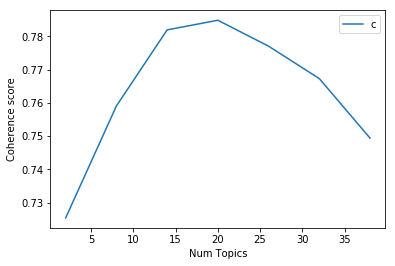

In [23]:
# Compute a list of LDA Mallet Models and corresponding Coherence Values
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence()) 
    return model_list, coherence_values
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized,
                                                        start=2, limit=40, step=6)

# Visualize the optimal LDA Mallet Model
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [24]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print('Num Topics =', m, ' has Coherence Value of', round(cv, 4))

Num Topics = 2  has Coherence Value of 0.7254
Num Topics = 8  has Coherence Value of 0.7591
Num Topics = 14  has Coherence Value of 0.782
Num Topics = 20  has Coherence Value of 0.7849
Num Topics = 26  has Coherence Value of 0.7771
Num Topics = 32  has Coherence Value of 0.7673
Num Topics = 38  has Coherence Value of 0.7494


With our models trained, and the performances visualized, we can see that the optimal number of topics here is **20 topics** with a Coherence Score of **0.78** which is slightly higher than our previous results at 0.77. However, we can also see that the model with a coherence score of 0.78 is also the highest scoring model, which implies that there are a total 20 dominant topics in this document.

We will proceed to select our final model using 20 topics.

In [25]:
# Select the model with highest coherence value and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10)) # Set num_words parament to show 10 words per each topic

[(0,
  '0.282*"company" + 0.231*"people" + 0.077*"place" + 0.051*"grad" + '
  '0.026*"challenge" + 0.026*"compensation" + 0.026*"contract" + '
  '0.026*"progress" + 0.026*"smart" + 0.026*"intern"'),
 (1,
  '0.367*"company" + 0.102*"cloud" + 0.041*"strategist" + 0.041*"environment" '
  '+ 0.041*"employee" + 0.020*"pry" + 0.020*"usa" + 0.020*"break" + '
  '0.020*"atmosphere" + 0.020*"term"'),
 (2,
  '0.164*"review" + 0.164*"amazing" + 0.145*"senior" + 0.109*"job" + '
  '0.109*"balance" + 0.055*"great" + 0.036*"big" + 0.018*"compensation" + '
  '0.018*"java" + 0.018*"ep"'),
 (3,
  '0.333*"good" + 0.083*"review" + 0.083*"pay" + 0.062*"environment" + '
  '0.042*"senior" + 0.042*"outstanding" + 0.021*"depend" + 0.021*"point" + '
  '0.021*"hype" + 0.021*"worrying"'),
 (4,
  '0.314*"great" + 0.137*"program" + 0.078*"perk" + 0.059*"time" + '
  '0.059*"staff" + 0.039*"analytical" + 0.020*"technician" + 0.020*"average" + '
  '0.020*"coworker" + 0.020*"datum"'),
 (5,
  '0.530*"place" + 0.045*"perf

By using our **Optimal LDA Mallet Model** using Gensim's Wrapper package, we displayed the 20 topics in our document along with the top 10 keywords and their corresponding weights that makes up each topic.

## 10.1 Visual the Optimal LDA Mallet Model

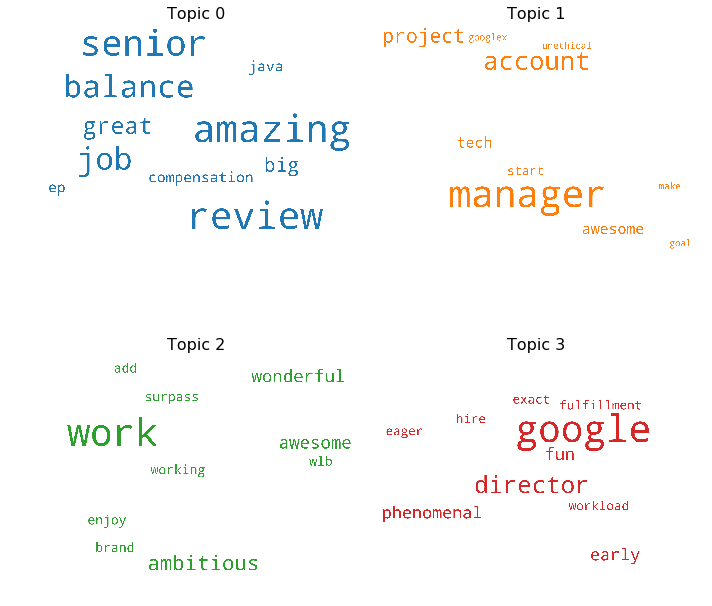

In [26]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
topics = optimal_model.show_topics(formatted=False)
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Here we also visualized the first 4 topics in our document along with the top 10 keywords. Each keyword's corresponding weights are shown by the size of the text.

Based on the visualization, we see the following topics:
- Topic 0: Employee Compensation
- Topic 1: Manager
- Topic 2: Employee Growth
- Topic 3: Employee Happiness

# 11 Analysis

Now that our **Optimal Model** is constructed, we will utilize the purpose of LDA and determine the following:
- Determine the dominant topics for each document
- Determine the most relevant document for each of the 20 dominant topics
- Determine the distribution of documents contributed to each of the 20 dominant topics

## 11.1 Finding topics for each document

In [27]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data):
    sent_topics_df = pd.DataFrame()
    # Get dominant topic in each document
    for i, row in enumerate(ldamodel[corpus]):                   
        row = sorted(row, key=lambda x: (x[1]), reverse=True)        
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:                                           
                wp = ldamodel.show_topic(topic_num)              
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4),
                                                                  topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'] # create dataframe title
    # Add original text to the end of the output (recall that texts = data_lemmatized)
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)    
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Document']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Document
0,0,6.0,0.0577,"company, good, product, team, ad, depend, effe...",Best Company to work for
1,1,4.0,0.0798,"great, program, perk, time, staff, analytical,...",Moving at the speed of light burn out is inevi...
2,2,10.0,0.0731,"manager, account, project, tech, awesome, star...",Great balance between bigcompany security and ...
3,3,13.0,0.0648,"work, intern, analyst, internship, love, engin...",The best place Ive worked and also the most de...
4,4,11.0,0.0833,"software, dream, developer, data, meh, rough, ...",Unique one of a kind dream job
5,5,13.0,0.0723,"work, intern, analyst, internship, love, engin...",NICE working in GOOGLE as an INTERN
6,6,15.0,0.0630,"engineer, lead, experience, bad, stuff, teamma...",Software engineer
7,7,0.0,0.0628,"company, people, place, grad, challenge, compe...",great place to work and progress
8,8,14.0,0.0660,"work, ambitious, wonderful, awesome, add, wlb,...",Google Surpasses Realistic Expectations
9,9,15.0,0.0588,"engineer, lead, experience, bad, stuff, teamma...",Execellent for engineers


Here we see a list of the first 10 document with corresponding dominant topics attached.

## 11.2 Finding documents for each topic

In [28]:
# Group top 20 documents for the 20 dominant topic
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic') 
for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], axis=0)
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Document"]
sent_topics_sorteddf_mallet 

,Topic_Num,Topic_Perc_Contrib,Keywords,Document
0,0.0,0.0804,"company, people, place, grad, challenge, compe...",Company full of people running around caring o...
1,1.0,0.0833,"company, cloud, strategist, environment, emplo...",I broke down crying on the datacenter floor
2,2.0,0.0717,"review, amazing, senior, job, balance, great, ...",Amazing place to develop technical skills
3,3.0,0.0744,"good, review, pay, environment, senior, outsta...",Good pay and work
4,4.0,0.0807,"great, program, perk, time, staff, analytical,...",Average with a hint of arrogance
5,5.0,0.0778,"place, perfect, technical, life, overpay, iii,...",Not perfect but still the best place in the wo...
6,6.0,0.0702,"company, good, product, team, ad, depend, effe...",Best Company in the world
7,7.0,0.0874,"great, benefit, excellent, product, lot, class...",Great benefits but large enough to get lost in
8,8.0,0.0713,"good, analyst, business, pgm, year, educator, ...",Good company with good benefits lots of red ta...
9,9.0,0.0828,"google, director, phenomenal, early, fun, fulf...",Early Childhood Educator


Here we see a list of most relevant documents for each of the 20 dominant topics.

## 11.3 Document distribution across Topics

In [29]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_num_keywords = {'Topic_Num': pd.Series([0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,
                                              11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0])}
topic_num_keywords = pd.DataFrame(topic_num_keywords)
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)
df_dominant_topics.reset_index(drop=True, inplace=True)
df_dominant_topics.columns = ['Dominant Topic', 'Num_Document', 'Perc_Document']
df_dominant_topics

,Dominant Topic,Num_Document,Perc_Document
0,0.0,35,0.070
1,1.0,32,0.064
2,2.0,20,0.040
3,3.0,24,0.048
4,4.0,27,0.054
5,5.0,35,0.070
6,6.0,19,0.038
7,7.0,17,0.034
8,8.0,22,0.044
9,9.0,33,0.066


Here we see the number of documents and the percentage of overall documents that contributes to each of the 20 dominant topics.

# 12 Answering the Questions

Based on our modeling above, we were able to use a very accurate model from Gibb's Sampling, and further optimize the model by finding the optimal number of dominant topics without redundancy.

As a result, we are now able to see the 20 dominant topics that were extracted from our dataset. Furthermore, we are also able to see the dominant topic for each of the 500 documents, and determine the most relevant document for each dominant topics.

With the in-depth analysis of each individual topics and documents above, Employers can use this approach to learn the topics from Employer Reviews, and then make appropriate adjustments to improve their work environment, which can ultimately improve employee productivity/retention.